# Epidemiological data of COVID-19 patients in South Korea 
Source: https://www.kaggle.com/kimjihoo/coronavirusdataset#PatientInfo.csv

In [316]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px

In [238]:
covid = pd.read_csv("C:/Users/User/Desktop/PatientInfo.csv", sep=',')  

In [239]:
covid

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
5,1000000006,10.0,female,1966.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,3.0,1.000000e+09,43.0,NaN,2020-01-31,2020-02-19,NaN,released
6,1000000007,11.0,male,1995.0,20s,Korea,Seoul,Jongno-gu,NaN,contact with patient,3.0,1.000000e+09,0.0,NaN,2020-01-31,2020-02-10,NaN,released
7,1000000008,13.0,male,1992.0,20s,Korea,Seoul,etc,NaN,overseas inflow,1.0,NaN,0.0,NaN,2020-02-02,2020-02-24,NaN,released
8,1000000009,19.0,male,1983.0,30s,Korea,Seoul,Songpa-gu,NaN,overseas inflow,2.0,NaN,68.0,NaN,2020-02-05,2020-02-21,NaN,released
9,1000000010,21.0,female,1960.0,60s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,3.0,1.000000e+09,6.0,NaN,2020-02-05,2020-02-29,NaN,released


In [240]:
covid = covid.drop(['global_num', 'infection_order','deceased_date'], axis=1)
#covid['sex'] = pd.get_dummies(covid.sex) в итоге не пригодилось

In [241]:
covid['disease'].notna().sum()

18

In [242]:
covid = covid.drop(['disease'], axis=1)

In [243]:
covid.dtypes

patient_id              int64
sex                    object
birth_year            float64
age                    object
country                object
province               object
city                   object
infection_case         object
infected_by           float64
contact_number        float64
symptom_onset_date     object
confirmed_date         object
released_date          object
state                  object
dtype: object

In [244]:
covid['birth_year'].isna().sum()

464

In [245]:
covid['age'].isna().sum()

105

In [246]:
covid = covid.dropna(subset=['age'])

In [247]:
covid['age'] = covid['age'].str.replace(r's', '').astype(int)

In [251]:
X = covid.groupby(['sex','age'],as_index=False).aggregate({'patient_id':'count'}).rename(columns={'patient_id': 'number_of_patients'})
X

,sex,age,number_of_patients
0,female,0,16
1,female,10,55
2,female,20,379
3,female,30,192
4,female,40,264
5,female,50,343
6,female,60,201
7,female,70,117
8,female,80,102
9,female,90,30


In [249]:
covid['age'].loc[covid.age==66] = 60

C:\Users\User\Miniconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



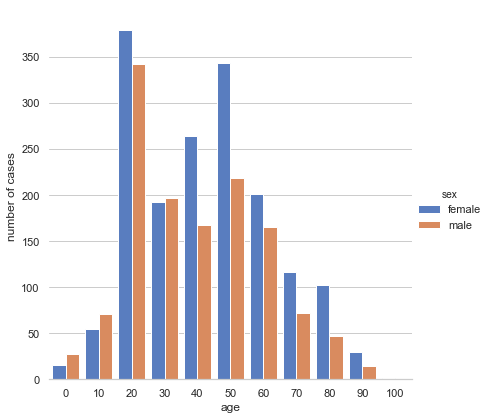

In [252]:
sns.set(style="whitegrid")
g = sns.catplot(x="age", y="number_of_patients", hue="sex", data=X,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("number of cases")
g.set_xlabels("age")


In [253]:
# but I think that plotly is much more prettier
fig_c = px.bar(X, x="number_of_patients", y="age", 
               text='number_of_patients', color='sex',orientation='h')
fig_c.show(height=600)

In [282]:
fig = px.scatter(covid, x="age", y="contact_number", color = "contact_number")

fig.show()

In [255]:
covid_1 = covid.dropna(subset=['released_date','confirmed_date'])
covid_1.released_date = covid_1['released_date'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d').timestamp())
covid_1.confirmed_date = covid_1['confirmed_date'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d').timestamp())


C:\Users\User\Miniconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [259]:
covid_1

,patient_id,sex,birth_year,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,state,duration(days)
0,1000000001,male,1964.0,50,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75.0,2020-01-22,1.579727e+09,1.580850e+09,released,13.0
1,1000000002,male,1987.0,30,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31.0,NaN,1.580332e+09,1.583096e+09,released,32.0
2,1000000003,male,1964.0,50,Korea,Seoul,Jongno-gu,contact with patient,2.002000e+09,17.0,NaN,1.580332e+09,1.582060e+09,released,20.0
3,1000000004,male,1991.0,20,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9.0,2020-01-26,1.580332e+09,1.581714e+09,released,16.0
4,1000000005,female,1992.0,20,Korea,Seoul,Seongbuk-gu,contact with patient,1.000000e+09,2.0,NaN,1.580418e+09,1.582492e+09,released,24.0
5,1000000006,female,1966.0,50,Korea,Seoul,Jongno-gu,contact with patient,1.000000e+09,43.0,NaN,1.580418e+09,1.582060e+09,released,19.0
6,1000000007,male,1995.0,20,Korea,Seoul,Jongno-gu,contact with patient,1.000000e+09,0.0,NaN,1.580418e+09,1.581282e+09,released,10.0
7,1000000008,male,1992.0,20,Korea,Seoul,etc,overseas inflow,NaN,0.0,NaN,1.580591e+09,1.582492e+09,released,22.0
8,1000000009,male,1983.0,30,Korea,Seoul,Songpa-gu,overseas inflow,NaN,68.0,NaN,1.580850e+09,1.582232e+09,released,16.0
9,1000000010,female,1960.0,60,Korea,Seoul,Seongbuk-gu,contact with patient,1.000000e+09,6.0,NaN,1.580850e+09,1.582924e+09,released,24.0


In [257]:
covid_1['duration(days)']= (covid_1.released_date - covid_1.confirmed_date)/86400

C:\Users\User\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



C:\Users\User\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



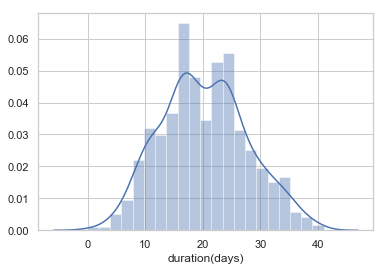

In [260]:
sns.distplot(covid_1['duration(days)'])

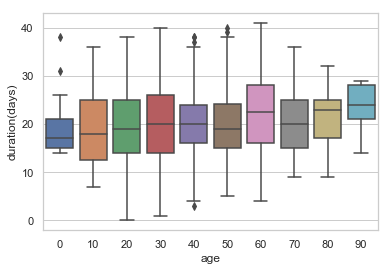

In [278]:
ax = sns.boxplot(x=covid_1.age, y=covid_1['duration(days)'], data = covid_1)

In [295]:
K=covid.sort_values('confirmed_date').groupby('confirmed_date').aggregate({'patient_id':'count'}).rename(columns={'patient_id': 'number_of_cases'})
K

,number_of_cases
confirmed_date,
2020-01-20,1
2020-01-23,1
2020-01-26,1
2020-01-27,1
2020-01-30,3
2020-01-31,4
2020-02-01,1
2020-02-02,3
2020-02-03,1


C:\Users\User\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



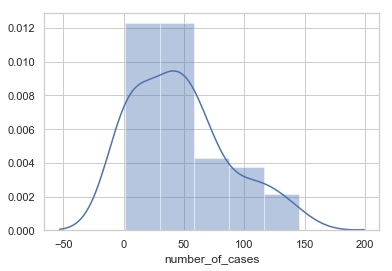

In [309]:
sns.distplot(K['number_of_cases'])

In [310]:
Ka=covid.groupby('infection_case').aggregate({'patient_id':'count'}).rename(columns={'patient_id': 'number_of_cases'})
Ka

,number_of_cases
infection_case,
Bonghwa Pureun Nursing Home,31
Changnyeong Coin Karaoke,4
Cheongdo Daenam Hospital,21
Dongan Church,17
Eunpyeong St. Mary's Hospital,16
Geochang Church,6
Guro-gu Call Center,112
Gyeongsan Cham Joeun Community Center,10
Gyeongsan Jeil Silver Town,12


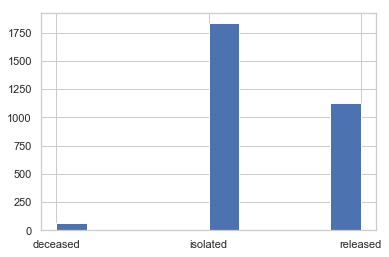

In [147]:
covid.state.hist()